Clustering is used in market segmentation; where we try to find customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import sklearn.cluster as cluster

import warnings
warnings.filterwarnings("ignore")

# Dataset1: (UCI: IRIS dataset)

In [9]:
# credible or not credible clients. 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ["sepal_length","sepal_width",
"petal_length","petal_width","species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


you can clearly see that there is positive correlation between the petal-length and petal-width column which is a good indicator for clustering.


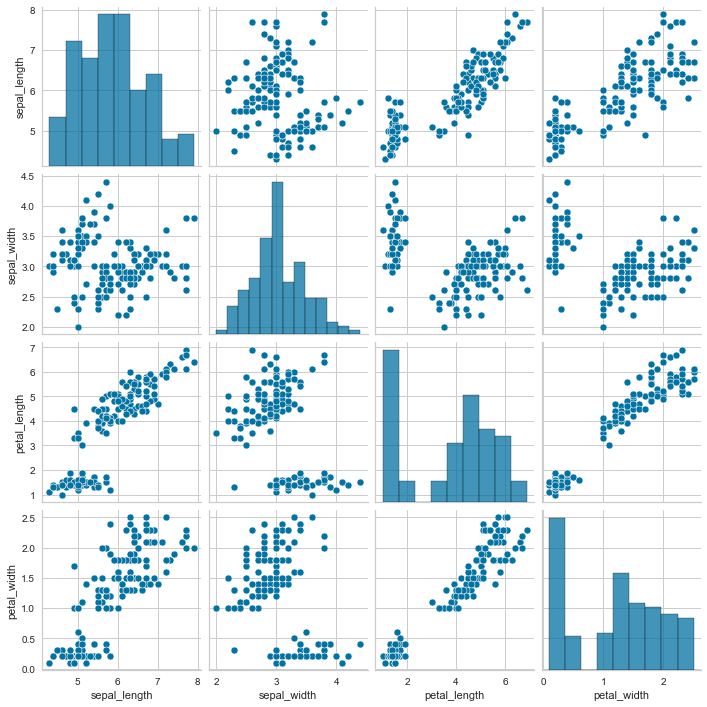

In [3]:
sns.pairplot(df)
print("you can clearly see that there is positive correlation between the petal-length and petal-width column which is a good indicator for clustering.")

In [4]:
#We will use only these two attributes for clustering because that way, it will be easier for us to plot the data. Execute the following script
#to remove the sepal-length and sepal-width attributes from our dataset.
df = df[['petal_length', 'petal_width']]

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

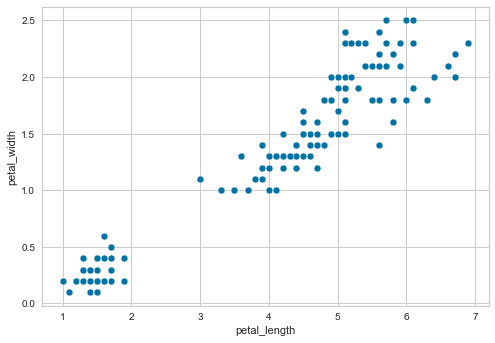

In [5]:
sns.scatterplot(x="petal_length", y="petal_width", data=df)

# Agglomerative Clustering

In [18]:
#Divide our data into three clusters:
clusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

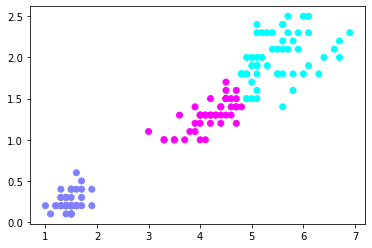

In [22]:
#plot the data points to see three clusters
plt.scatter(df['petal_length'] ,df['petal_width'], c= clusters.labels_, cmap='cool')

# DBSCAN CLUSTERING

In [206]:
x=df.iloc[:,[2,3]].values

In [207]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

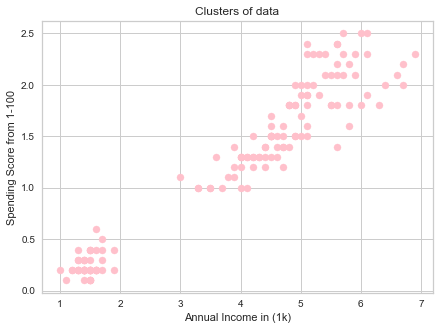

In [208]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.title('Clusters of data')
plt.show()

# HIERARCHICAL CLUSTERING 

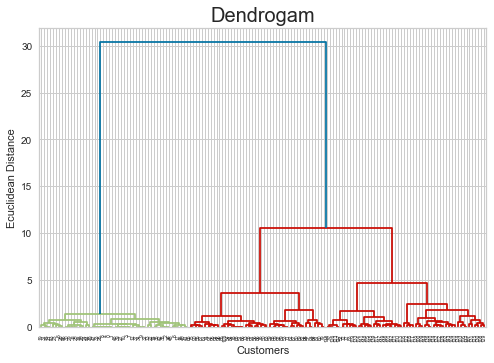

In [209]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.ylabel('Ecuclidean Distance')
plt.show()


# K-MEANS CLUSTERING

In [10]:
#K-means
le = LabelEncoder()
le.fit(df['species'])
df['species'] = le.transform(df['species'])

In [11]:
features = df.iloc[:, 0:4]
target = df.iloc[:, -1]

In [129]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [131]:
features = StandardScaler().fit_transform(features)

The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.


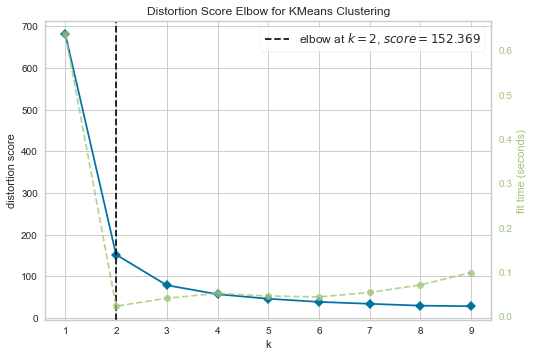

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

print("The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.")
visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=10)

In [13]:
#Fitting the model to all the data except for the 'target'.
#We can do do this using drop()
kmeans.fit(df.drop('species',axis=1))

KMeans(max_iter=10, n_clusters=2)

In [14]:
#calculating centers
centers = kmeans.cluster_centers_
centers

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925]])

In [15]:
#Let's add a new column called labels that contemplated our predictions with the algorithm Kmeans
df['labels'] = kmeans.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# check how many of the samples were correctly labeled

In [19]:
#Check quality of weak classification by the model
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))


Result: 3 out of 150 samples were correctly labeled.


In [20]:
#Accuracy
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Accuracy score: 0.02


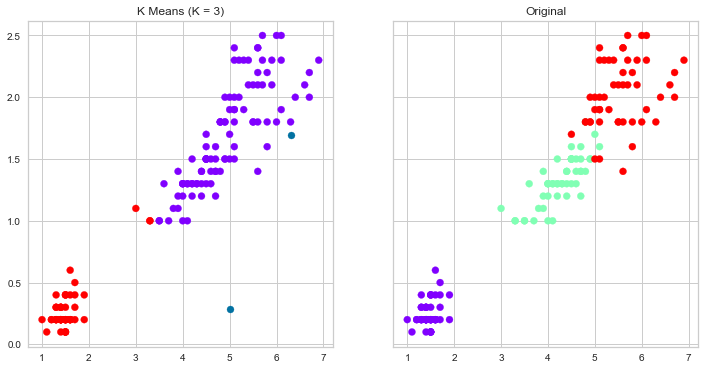

In [147]:
#We have below our two plots, the left being the clusters 
#we generate through our Kmeans model and on the right we have the correct labels that came from Dataset.
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize = (12,6) )

# For fitted with kmeans 
ax1.set_title('K Means (K = 3)')
ax1.scatter(x = df['petal_length'], y = df['petal_width'], 
            c = df['labels'], cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 3],
           );

# For original data 
ax2.set_title("Original")
ax2.scatter(x = df['petal_length'], y = df['petal_width'], 
            c = df['species'], cmap='rainbow')


# Dataset2: (UCI: seed dataset)

In [21]:
seed_df = pd.read_csv('Seed_Data.csv')
seed_df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [38]:
seed_df.describe(include = "all")

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


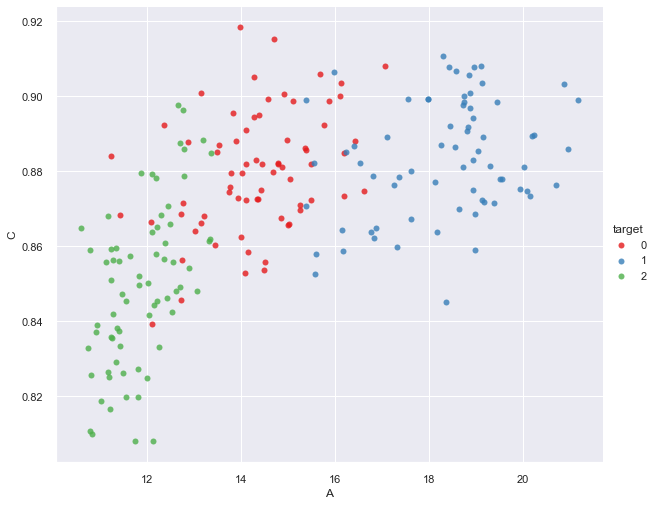

In [16]:
#**How the area 'A' is related to the compactness 'C'.
sns.set(style="darkgrid")
sns.lmplot('A','C',data=seed_df, hue='target',
           palette='Set1',size=7,aspect=1.2,fit_reg=False);

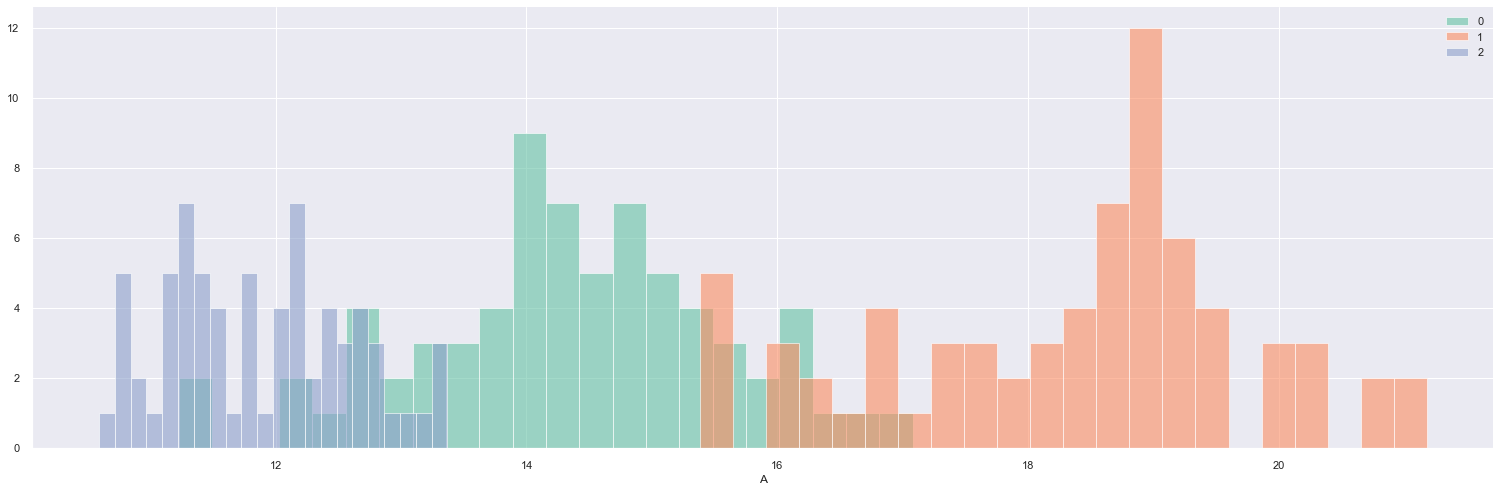

In [18]:
#we will generate a histogram to visualize the data by class
g = sns.FacetGrid(data = seed_df, hue='target', palette='Set2', size=7, aspect=3)
g = g.map(plt.hist,'A',bins=22,alpha=0.6)
plt.legend();

The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.


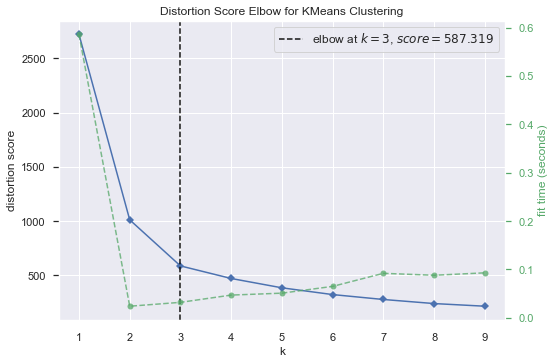

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#Elbow method to find optimal k (number of clusters)
features = seed_df.iloc[:, 0:7]
target = seed_df.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

print("The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.")
visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

# K-Means Clustering

In [23]:
#Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [150]:
#Calculate silhouette coefficient for above clustering
#0.47 would be an average value for silhouette coeffiencit. -1 is the worst and +1 is the optimal.
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)
print("0.47 would be an average value for silhouette coeffiencit. -1 is the worst and +1 is the optimal.")

silhouette coefficient for the above clutering =  0.4589717867018717
0.47 would be an average value for silhouette coeffiencit. -1 is the worst and +1 is the optimal.


In [151]:
#Calculate Purity of the above clustering
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.8333333333333334


In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [25]:
#Fitting the model to all the data except for the 'target'.
#We can do do this using drop()
kmeans.fit(seed_df.drop('target',axis=1))

KMeans(n_clusters=3)

In [26]:
#calculating centers
centers = kmeans.cluster_centers_
centers

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [27]:
#Let's add a new column called klabels that contemplated our predictions with the algorithm Kmeans
seed_df['labels'] = kmeans.labels_
seed_df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2


# check how many of the samples were correctly labeled

In [28]:
#Check quality of weak classification by the model
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

Result: 71 out of 210 samples were correctly labeled.


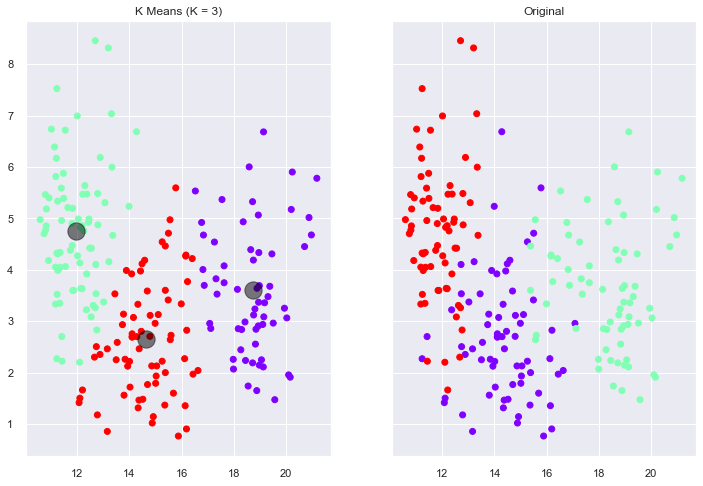

In [44]:
#We have below our two plots, the left being the clusters 
#we generate through our Kmeans model and on the right we have the correct labels that came from Dataset.
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize = (12,8) )

# For fitted with kmeans 
ax1.set_title('K Means (K = 3)')
ax1.scatter(x = seed_df['A'], y = seed_df['A_Coef'], 
            c = seed_df['labels'], cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 5],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = seed_df['A'], y = seed_df['A_Coef'], 
            c = seed_df['target'], cmap='rainbow')


# DBSCAN CLUSTERING

In [211]:
x=seed_df.iloc[:,[2,3]].values

In [212]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

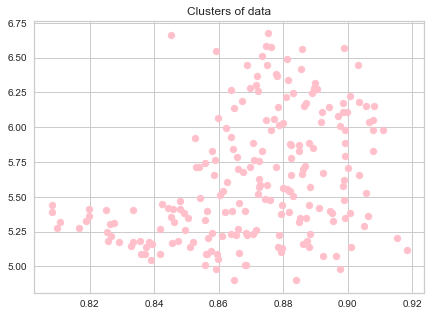

In [215]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.title('Clusters of data')
plt.show()

# HIERARCHICAL CLUSTERING

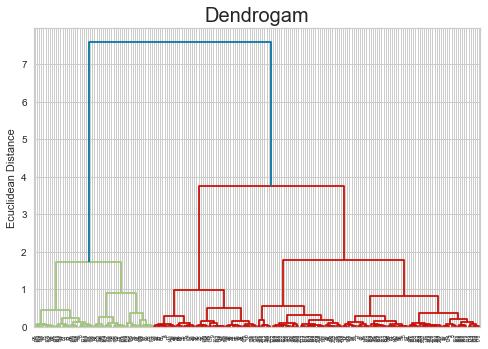

In [216]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.ylabel('Ecuclidean Distance')
plt.show()


# Dataset3: Kaggle Customer Segmentation 

In [29]:
df = pd.read_csv('mallClusters.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


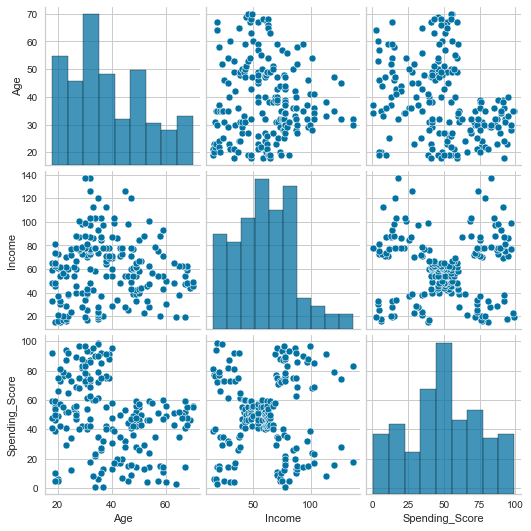

In [32]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Age','Income', 'Spending_Score']])

In [30]:
le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

In [31]:
#Elbow method to find optimal k (number of clusters)
features = df.iloc[:, 0:5]
target = df.iloc[:, -1]
features

,CustomerID,Gender,Age,Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.


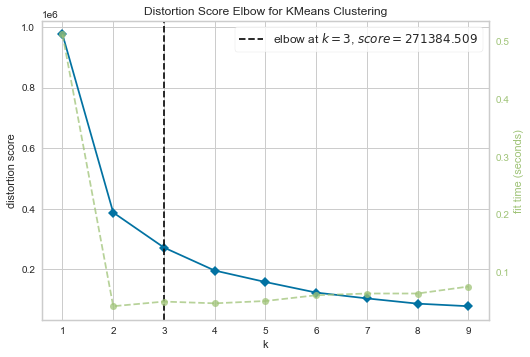

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

print("The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.")
visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [32]:
#Perform K-Mean Clustering with 5 Clusters
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [33]:
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ]])

In [34]:
df['Clusters'] = kmeans.labels_

In [59]:
df['Clusters'].value_counts()

0    81
2    39
1    35
3    23
4    22
Name: Clusters, dtype: int64

# check how many of the samples were correctly labeled

In [35]:
#Check quality of weak classification by the model
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

Result: 80 out of 200 samples were correctly labeled.


<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

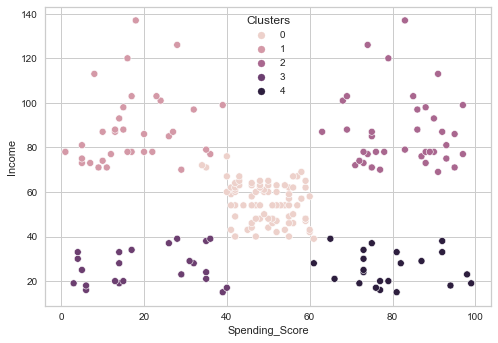

In [60]:
#Ploting Cluster
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

# DBSCAN CLUSTERING

In [198]:
x=df.iloc[:,[2,3]].values

In [199]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

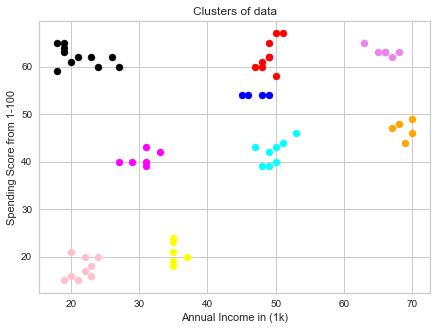

In [200]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

# HIERARCHICAL CLUSTERING

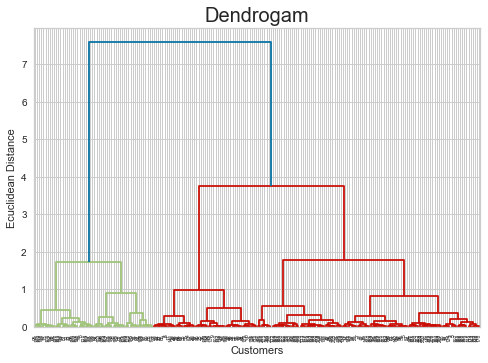

In [217]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


# Dataset4: Kaggle - Facebook Seller

In [218]:
df = pd.read_csv('Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [219]:
df.drop(['Column1', 'Column2','Column3','Column4'], axis=1, inplace=True)

In [106]:
df.shape

(7050, 12)

In [220]:
#Convert categorical variable into integers 
le = LabelEncoder()
le.fit(df['status_type'])
df['status_type'] = le.transform(df['status_type'])

In [221]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [109]:
#Elbow method to find optimal k (number of clusters)
features = df.iloc[:, 0:12]
target =  df['status_type']
features

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


# K-Means Clustering

The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.


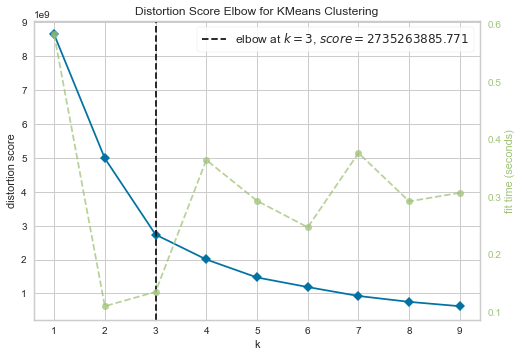

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

print("The lowest distortion, which is sum of square distances from each point to its assigned cluster, is found at k = 3 hence this clustering is optimal when 3 clusters are used. We used k-means and k-mediods with k = 3 in following clustering experiments.")
visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [111]:
#K-Means model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(features)

KMeans(n_clusters=3, random_state=0)

In [112]:
kmeans.cluster_centers_

array([[1.82231405e+00, 1.71315289e+03, 3.17871901e+02, 1.17700413e+02,
        1.65226033e+03, 4.77747934e+01, 9.73347107e+00, 2.60950413e+00,
        4.13223140e-01, 3.61570248e-01],
       [1.66884430e+00, 1.13000000e+02, 1.08951003e+02, 2.47901695e+01,
        1.03412350e+02, 8.33551097e+00, 5.78783637e-01, 4.09706020e-01,
        1.82454503e-01, 7.82392285e-02],
       [2.98540146e+00, 4.86737226e+02, 5.30959124e+03, 4.80408759e+02,
        3.76072993e+02, 9.50729927e+01, 4.80291971e+00, 7.39416058e+00,
        2.51824818e+00, 8.75912409e-01]])

# check how many of the samples were correctly labeled

In [113]:
#Check quality of weak classification by the model
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


Result: 4077 out of 7050 samples were correctly labeled.


In [114]:
#Accuracy
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58


<AxesSubplot:xlabel='num_comments', ylabel='num_likes'>

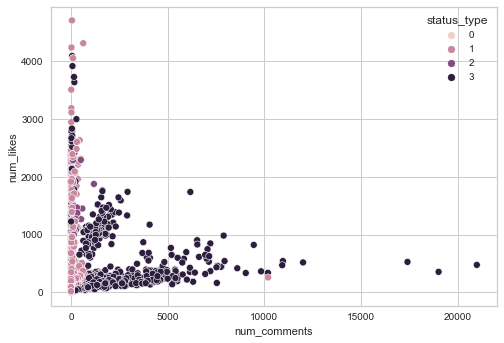

In [116]:
#Ploting Cluster
sns.scatterplot(x="num_comments", y="num_likes",hue = 'status_type',  data=df)

# DBSCAN CLUSTERING

In [222]:
x=df.iloc[:,[2,3]].values

In [223]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

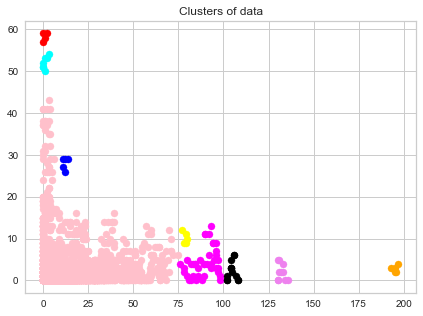

In [226]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.title('Clusters of data')
plt.show()

# HIERARCHICAL CLUSTERING

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.ylabel('Ecuclidean Distance')
plt.show()


# Conclusion

For above 4 datasets, hierarchical clustering and K-means outperform and better than DBSCan